In [7]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.utils import resample

In [8]:
df_cata=pd.read_csv('C:/Users/missa/OneDrive/Bureau/Cours_Bihar/TPT/Data/catalogue4.csv')
df_imm=pd.read_csv('C:/Users/missa/OneDrive/Bureau/Cours_Bihar/TPT/Data/Immatriculations.csv', encoding = 'ISO-8859-1')
df_imm.head()

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310


In [9]:
df3=pd.merge(df_imm,df_cata, left_on=['marque','nom','puissance','longueur','nbPlaces','nbPortes','couleur','occasion','prix'], right_on=['marque','nom','puissance','longueur','nbPlaces','nbPortes','couleur','occasion','prix'], how='left')
df3

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
0,3176 TS 67,Renault,Laguna 2.0T,170,longue,5,5,blanc,False,27300,99,familiale
1,3721 QS 49,Volvo,S80 T6,272,très longue,5,5,noir,False,50500,1,sportive
2,9099 UV 26,Volkswagen,Golf 2.0 FSI,150,moyenne,5,5,gris,True,16029,41,hatchback
3,3563 LA 55,Peugeot,1007 1.4,75,courte,5,5,blanc,True,9625,113,micro
4,6963 AX 34,Audi,A2 1.4,75,courte,5,5,gris,False,18310,262,micro
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,771 CQ 78,Mercedes,S500,306,très longue,5,5,gris,True,70910,150,sportive
1999996,8182 PL 97,Lancia,Ypsilon 1.4 16V,90,courte,5,3,blanc,True,9450,173,micro
1999997,8550 AP 53,Ford,Mondeo 1.8,125,longue,5,5,rouge,False,23900,209,familiale
1999998,737 MK 20,Audi,A2 1.4,75,courte,5,5,bleu,True,12817,263,micro


In [10]:
client1=pd.read_csv("C:/Users/missa/OneDrive/Bureau/Cours_Bihar/TPT/TPT 2023/Données par groupe/Groupe_TPT_1/Groupe_TPT_1/Clients_11.csv", encoding = 'ISO-8859-1')
client2=pd.read_csv("C:/Users/missa/OneDrive/Bureau/Cours_Bihar/TPT/TPT 2023/Données par groupe/Groupe_TPT_1/Groupe_TPT_1/Clients_12.csv", encoding = 'ISO-8859-1')
client=pd.concat([client1,client2]).reset_index(drop=True)
client



,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,44,M,476,En Couple,0,false,3176 TS 67
1,20,M,422,En Couple,2,false,3721 QS 49
2,49,F,221,Célibataire,0,false,9099 UV 26
3,57,M,246,Célibataire,0,false,3563 LA 55
4,58,M,1149,Célibataire,0,false,6963 AX 34
...,...,...,...,...,...,...,...
199995,40,Féminin,1000,Célibataire,0,false,8108 RO 11
199996,21,Femme,235,Célibataire,0,false,7268 LO 18
199997,64,M,179,En Couple,0,false,9059 XM 27
199998,71,M,836,Célibataire,0,false,9945 TN 57


In [11]:
client.isnull().sum()

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
dtype: int64

In [12]:
final=pd.merge(client,df3, left_on=['immatriculation'], right_on=['immatriculation'], how='left')
final.drop(['marque','nom','puissance','longueur','nbPlaces','nbPortes','couleur','occasion','prix'], inplace=True, axis=1)
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,familiale
1,20,M,422,En Couple,2,false,3721 QS 49,1,sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,micro
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,micro
...,...,...,...,...,...,...,...,...,...
200665,40,Féminin,1000,Célibataire,0,false,8108 RO 11,266,micro
200666,21,Femme,235,Célibataire,0,false,7268 LO 18,118,micro
200667,64,M,179,En Couple,0,false,9059 XM 27,4,sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,hatchback


In [13]:
duplicate = final[final.duplicated('immatriculation')]
duplicate=list(final.immatriculation.values)
duplicate

['3176 TS 67',
 '3721 QS 49',
 '9099 UV 26',
 '3563 LA 55',
 '6963 AX 34',
 '5592 HQ 89',
 '674 CE 26',
 '1756 PR 31',
 '6705 GX 50',
 '4487 DR 75',
 '4487 DR 75',
 '7080 NW 34',
 '9626 HF 36',
 '2401 PA 98',
 '826 YF 89',
 '8216 GR 23',
 '8076 YM 23',
 '9277 JN 49',
 '4231 HC 31',
 '2319 IQ 28',
 '148 RS 75',
 '6786 JV 36',
 '8049 KN 17',
 '9610 BR 52',
 '8745 KJ 12',
 '5805 YN 37',
 '7341 QB 17',
 '9925 TY 41',
 '6238 TQ 16',
 '4395 AS 40',
 '1295 WZ 85',
 '3228 PI 22',
 '3367 NG 10',
 '5784 HC 14',
 '6685 TE 75',
 '6461 RY 26',
 '1498 MN 80',
 '4400 IT 29',
 '9066 UX 89',
 '9075 QO 83',
 '826 NJ 62',
 '1791 WG 33',
 '715 BO 44',
 '3484 AH 69',
 '9629 ZS 93',
 '5620 EV 51',
 '8548 AJ 17',
 '1891 YV 82',
 '6262 AO 31',
 '9721 LN 29',
 '8379 YQ 86',
 '2021 AV 73',
 '699 OU 38',
 '2267 LU 10',
 '2083 WU 93',
 '7871 FA 27',
 '4800 WC 72',
 '9016 HT 57',
 '6241 OH 14',
 '637 YM 58',
 '8728 LC 19',
 '7786 DF 35',
 '6745 IT 89',
 '6828 XD 36',
 '4794 CW 30',
 '3808 SY 57',
 '5169 SB 91',
 '

In [14]:
boolean = final['immatriculation'].value_counts()
a=list(boolean[boolean.values>0].index)

In [15]:
boolean = final['immatriculation'].value_counts()
a=list(boolean[boolean.values>0].index)
count=0
for i in a:
    print(i)
    if count<10:
        display(df3[df3['immatriculation']==i])
    else:
        break    
    count=count+1

3491 UO 84


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
78929,3491 UO 84,BMW,M5,507,très longue,5,5,bleu,False,94800,236,sportive
85012,3491 UO 84,BMW,M5,507,très longue,5,5,blanc,False,94800,232,sportive


9921 SH 10


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
2302,9921 SH 10,Nissan,Maxima 3.0 V6,200,très longue,5,5,gris,False,30000,126,familiale
830298,9921 SH 10,Jaguar,X-Type 2.5 V6,197,longue,5,5,gris,False,37100,180,familiale


4495 KK 61


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
850475,4495 KK 61,Volkswagen,Polo 1.2 6V,55,courte,5,3,blanc,False,12200,21,micro
858531,4495 KK 61,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,85,hatchback


93 NM 49


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
60859,93 NM 49,Renault,Megane 2.0 16V,135,moyenne,5,5,gris,False,22350,85,hatchback
809232,93 NM 49,Saab,9.3 1.8T,150,longue,5,5,bleu,False,38600,66,familiale


1498 GR 61


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
850784,1498 GR 61,Jaguar,X-Type 2.5 V6,197,longue,5,5,rouge,False,37100,183,familiale
875392,1498 GR 61,Seat,Toledo 1.6,102,longue,5,5,blanc,False,18880,55,familiale


9387 QD 31


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
15570,9387 QD 31,Audi,A2 1.4,75,courte,5,5,noir,True,12817,260,micro
61984,9387 QD 31,Renault,Vel Satis 3.5 V6,245,très longue,5,5,gris,False,49200,75,sportive


8775 VR 37


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
849889,8775 VR 37,Volvo,S80 T6,272,très longue,5,5,gris,False,50500,5,sportive
878681,8775 VR 37,Jaguar,X-Type 2.5 V6,197,longue,5,5,bleu,False,37100,189,familiale


2761 VB 93


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
18499,2761 VB 93,Mercedes,S500,306,très longue,5,5,rouge,True,70910,147,sportive
806875,2761 VB 93,Peugeot,1007 1.4,75,courte,5,5,gris,False,13750,112,micro


7814 WC 93


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
62448,7814 WC 93,Audi,A2 1.4,75,courte,5,5,noir,True,12817,260,micro
872792,7814 WC 93,Audi,A2 1.4,75,courte,5,5,noir,False,18310,265,micro


3171 HR 29


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,Unnamed: 0,categorie
824309,3171 HR 29,Fiat,Croma 2.2,147,longue,5,5,noir,False,24780,218,familiale
861413,3171 HR 29,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500,0,sportive


1769 OU 76


In [16]:
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,familiale
1,20,M,422,En Couple,2,false,3721 QS 49,1,sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,micro
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,micro
...,...,...,...,...,...,...,...,...,...
200665,40,Féminin,1000,Célibataire,0,false,8108 RO 11,266,micro
200666,21,Femme,235,Célibataire,0,false,7268 LO 18,118,micro
200667,64,M,179,En Couple,0,false,9059 XM 27,4,sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,hatchback


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import warnings
warnings.filterwarnings('ignore')
import matplotlib
plt.style.use('ggplot')
import re

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,3)

In [18]:
final.shape

(200670, 9)

In [19]:
final.isnull().sum()

age                   0
sexe                  0
taux                  0
situationFamiliale    0
nbEnfantsAcharge      0
2eme voiture          0
immatriculation       0
Unnamed: 0            0
categorie             0
dtype: int64

In [20]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200670 entries, 0 to 200669
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 200670 non-null  object
 1   sexe                200670 non-null  object
 2   taux                200670 non-null  object
 3   situationFamiliale  200670 non-null  object
 4   nbEnfantsAcharge    200670 non-null  object
 5   2eme voiture        200670 non-null  object
 6   immatriculation     200670 non-null  object
 7   Unnamed: 0          200670 non-null  int64 
 8   categorie           200670 non-null  object
dtypes: int64(1), object(8)
memory usage: 15.3+ MB


### 1 Data Cleaning

On va commencer par enlever les lignes contenant [' ','?','N/D'] dans les columns categorielles 'Sexe','situationFamiliale' et '2eme voiture' vu qu'il est difficile de les remplacer avec une autre valeur (prediction) et qu'ils vont servir d'un point de commencement pour le nettoyage des données pour les autres colonnes

In [21]:
final.sexe.value_counts(normalize=True)

M           0.684233
F           0.292869
Masculin    0.007176
Homme       0.006932
Femme       0.003144
Féminin     0.002746
            0.001042
?           0.000987
N/D         0.000872
Name: sexe, dtype: float64

In [22]:
null_values_sexe=['N/D',' ','?']
final=final.loc[~final.sexe.isin(null_values_sexe)]
final.sexe.value_counts(normalize=True)

M           0.686223
F           0.293721
Masculin    0.007197
Homme       0.006952
Femme       0.003154
Féminin     0.002754
Name: sexe, dtype: float64

In [23]:
final['sexe']=final['sexe'].replace(to_replace=["Masculin", "Homme"],value="M")
final['sexe']=final['sexe'].replace(to_replace=["Femme", "Féminin"],value="F")
final.sexe.value_counts(normalize=True)

M    0.700372
F    0.299628
Name: sexe, dtype: float64

In [24]:
final.situationFamiliale.value_counts(normalize=True)

En Couple      0.640048
Célibataire    0.298114
Seule          0.048893
Marié(e)       0.006357
Seul           0.002899
?              0.001100
N/D            0.001045
               0.000980
Divorcée       0.000565
Name: situationFamiliale, dtype: float64

In [25]:
null_values_sexe=['N/D',' ','?']
final=final.loc[~final.situationFamiliale.isin(null_values_sexe)]
final.situationFamiliale.value_counts(normalize=True)

En Couple      0.642054
Célibataire    0.299048
Seule          0.049047
Marié(e)       0.006377
Seul           0.002908
Divorcée       0.000567
Name: situationFamiliale, dtype: float64

In [26]:
final['situationFamiliale']=final['situationFamiliale'].replace(to_replace=["Célibataire", "Seule","Seul","Divorcée"],value="Célibataire")
final['situationFamiliale']=final['situationFamiliale'].replace(to_replace=["En Couple", "Marié(e)"],value="En Couple")
final.situationFamiliale.value_counts(normalize=True)

En Couple      0.648431
Célibataire    0.351569
Name: situationFamiliale, dtype: float64

In [27]:
final=final.loc[~final['2eme voiture'].isin(null_values_sexe)]
final['2eme voiture'].value_counts(normalize=True)

false    0.86992
true     0.13008
Name: 2eme voiture, dtype: float64

Maintenant on va imputer les valeurs manquantes de nbEnfantsAcharge avec la valeur la plus fréquente par un groupby de situationFamiliale et sexe.
La valeur trouvé dans notre cas est 0.

In [28]:
final.groupby(['situationFamiliale','sexe']).\
    agg(nbr_enfant=('nbEnfantsAcharge',lambda x: sp.stats.mode(x)[0]))

nbr_enfant
situationFamiliale sexe           
Célibataire        F           [0]
                   M           [0]
En Couple          F           [0]
                   M           [1]

In [29]:
final.nbEnfantsAcharge.value_counts()

0     89545
1     32914
2     32578
3     23428
4     19999
-1      200
        189
?       186
Name: nbEnfantsAcharge, dtype: int64

In [30]:
final.loc[(final["nbEnfantsAcharge"].isin(null_values_sexe))&(final['situationFamiliale']=='Célibataire'),'nbEnfantsAcharge']='0'
final.loc[(final["nbEnfantsAcharge"].isin(null_values_sexe))&(final['situationFamiliale']=='En Couple'),'nbEnfantsAcharge']='1'
final.loc[final["nbEnfantsAcharge"]=='-1','nbEnfantsAcharge']='0'

On a créer ici un data frame de passage pour rendre les variable age en float afin de réaliser la moyenne de l'age selon situationFamiliale et nbEnfantsAcharge pour remplacer les variables manquantes.
Les variables on été compris entre un intervalle faible[42.9-43.9] donc on a pris la valeur 43 comme valeur

In [31]:
final_temp=final[~final.isin(['?',' ','N/D']).any(axis=1)]
final_temp

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,familiale
1,20,M,422,En Couple,2,false,3721 QS 49,1,sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,micro
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,micro
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,micro
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,micro
200667,64,M,179,En Couple,0,false,9059 XM 27,4,sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,hatchback


In [32]:
final_temp['age'] = final_temp['age'].astype(float)

In [33]:
final_temp.groupby(['situationFamiliale','nbEnfantsAcharge']).\
    agg(moyen_age=('age',lambda x: np.mean(x)))

moyen_age
situationFamiliale nbEnfantsAcharge           
Célibataire        0                 43.571903
                   1                 43.605525
                   2                 42.964955
                   3                 43.434384
En Couple          0                 43.757995
                   1                 43.767095
                   2                 43.926668
                   3                 43.458738
                   4                 43.608377

In [34]:
final.loc[final["age"].isin(null_values_sexe),'age']='43'
final.loc[final["age"]=='-1','age']='43'


In [35]:
final[final.age.isin(null_values_sexe)]

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie


On va terminer avec l'autre variable numérique qui est Taux ou on va aussi passer par un dataframe de passage afin d'avoir la moyenne du taux selon nbEnfantsAcharge et situationFamiliale pour remplacer les valeurs manquantes.

la valeur prise est 605 (les moyennes étaient proche donc il n'y a des énormes valeurs abérantes)

In [36]:
final_temp=final[~final.isin(['?',' ','N/D']).any(axis=1)]
final_temp[['age','taux','nbEnfantsAcharge']] = final_temp[['age','taux','nbEnfantsAcharge']].astype(int)
final_temp

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,familiale
1,20,M,422,En Couple,2,false,3721 QS 49,1,sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,micro
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,micro
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,micro
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,micro
200667,64,M,179,En Couple,0,false,9059 XM 27,4,sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,hatchback


In [37]:
final_temp.groupby(['situationFamiliale','nbEnfantsAcharge']).\
    agg(taux_moyen=('taux',lambda x: np.mean(x)))

taux_moyen
situationFamiliale nbEnfantsAcharge            
Célibataire        0                 609.417754
                   1                 594.345201
                   2                 604.567722
                   3                 604.459146
En Couple          0                 606.354035
                   1                 607.597758
                   2                 609.147553
                   3                 605.057457
                   4                 609.579638

In [38]:
final.loc[final["taux"].isin(null_values_sexe),'taux']='605'
final.loc[final["taux"]=='-1','taux']='605'


In [39]:
final[['age','taux','nbEnfantsAcharge']] = final[['age','taux','nbEnfantsAcharge']].astype(int)

In [40]:
final[final.isin(['?',' ','N/D']).any(axis=1)]

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie


In [41]:
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,familiale
1,20,M,422,En Couple,2,false,3721 QS 49,1,sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,micro
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,micro
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,micro
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,micro
200667,64,M,179,En Couple,0,false,9059 XM 27,4,sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,hatchback


### 2 Data Visualisation

In [42]:
final.describe()

,age,taux,nbEnfantsAcharge,Unnamed: 0
count,199039.000000,199039.000000,199039.000000,199039.000000
mean,43.703500,608.423073,1.249032,153.805104
std,18.194297,334.562970,1.388626,84.520496
min,18.000000,150.000000,0.000000,0.000000
25%,28.000000,421.000000,0.000000,77.000000
50%,42.000000,522.000000,1.000000,165.000000
75%,56.000000,824.000000,2.000000,233.000000
max,84.000000,1399.000000,4.000000,269.000000


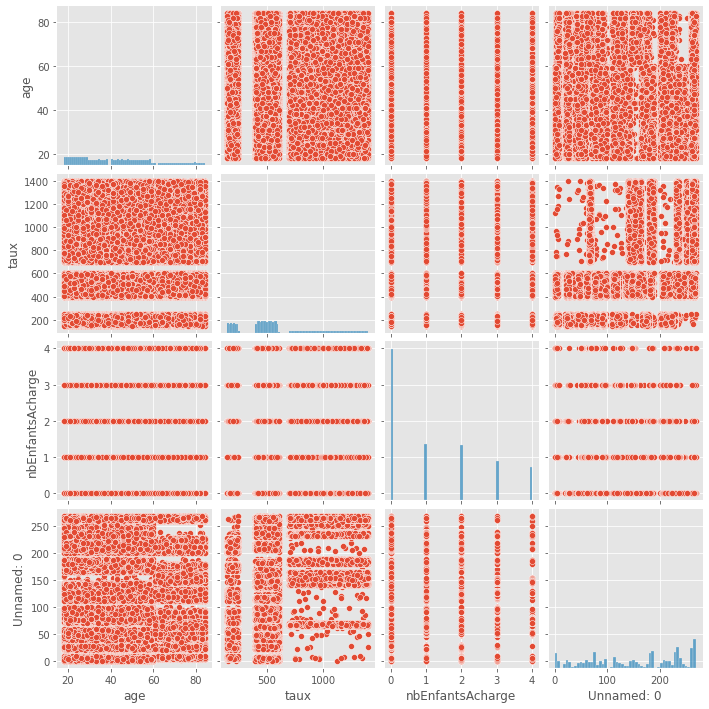

In [43]:
sns.pairplot(final)
plt.show()

<AxesSubplot:xlabel='categorie', ylabel='taux'>

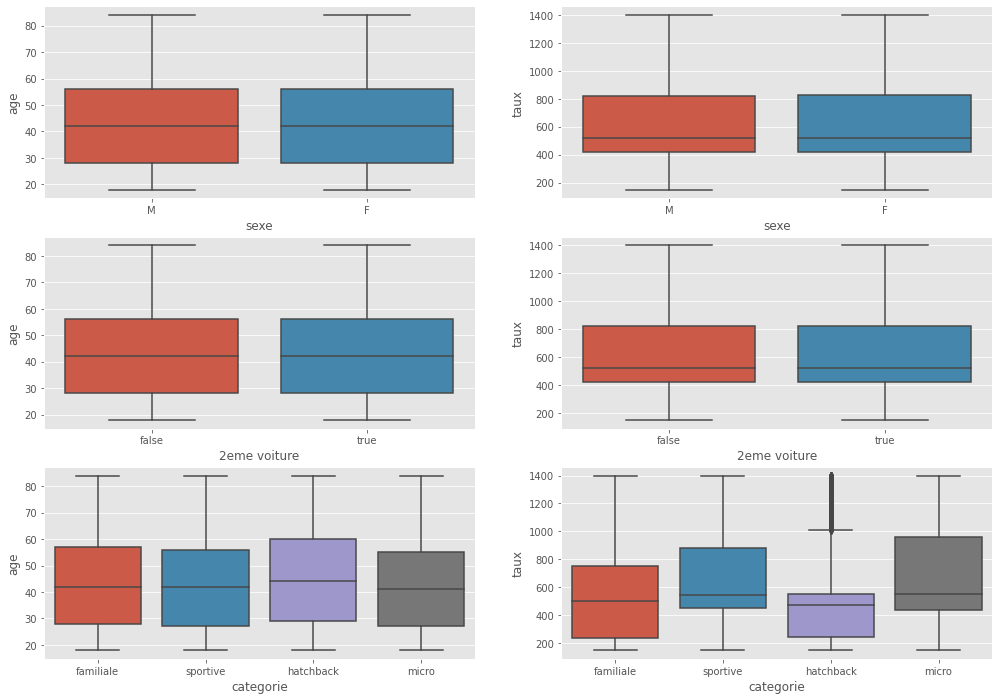

In [44]:
matplotlib.rcParams['figure.figsize'] = (17,12)
_, axs = plt.subplots(ncols = 2, nrows = 3)
sns.boxplot(x = final.sexe, y = final.age, ax=axs[0,0])
sns.boxplot(x = final.sexe, y = final.taux, ax=axs[0,1])
sns.boxplot(x = final['2eme voiture'], y = final.age, ax=axs[1,0])
sns.boxplot(x = final['2eme voiture'], y = final.taux, ax=axs[1,1])
sns.boxplot(x = final.categorie, y = final.age, ax=axs[2,0])
sns.boxplot(x = final.categorie, y = final.taux, ax=axs[2,1])

In [45]:
display(final[(final.taux>800)&(final.categorie=='Hatchback')].shape[0],final[final.categorie=='Hatchback'].shape[0])

0

0

Les box plots ne montrent pas de valeurs abérante sauf pour le cas du dernier plot qui présente quelque valeur abérante pour la catégorie micro au dessus du max et beaucoup de valeurs abérante pour la catégorie 'Hatchback' par rapport à la variable 'taux'

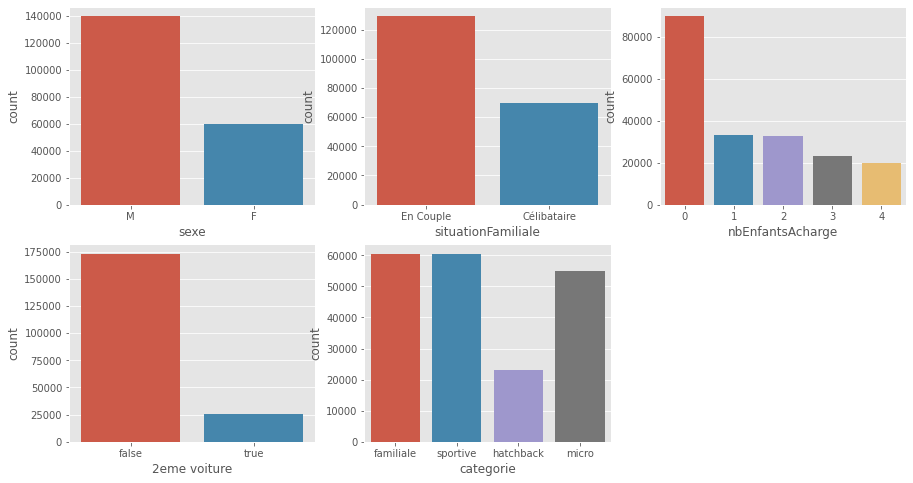

In [46]:
matplotlib.rcParams['figure.figsize'] = (15,8)
_, axs = plt.subplots(ncols = 3, nrows = 2)
sns.countplot(x=final.sexe, ax=axs[0,0])
sns.countplot(x=final.situationFamiliale, ax=axs[0,1])
sns.countplot(x=final.nbEnfantsAcharge, ax=axs[0,2])
sns.countplot(x=final['2eme voiture'], ax=axs[1,0])
sns.countplot(x=final.categorie, ax=axs[1,1])
_.delaxes(axs[1,2])
plt.show()

1) les countplots montrent que les personnes qui sont de sexe masculin sont plus nombreux, mais aussi ceux qui sont en couple ou meme les gens ne possedant pas une deuxieme voiture.
2) plus le nombre d'enfant pris en charge augmente plus il y a moins de personne dans cette catégorie
3) on constate que la voiture la plus acheté est la Sportive suivi par la Berline par contre on trouve en bas du classement la Micro et la Hatchback avec un nombre un peu plus élevé

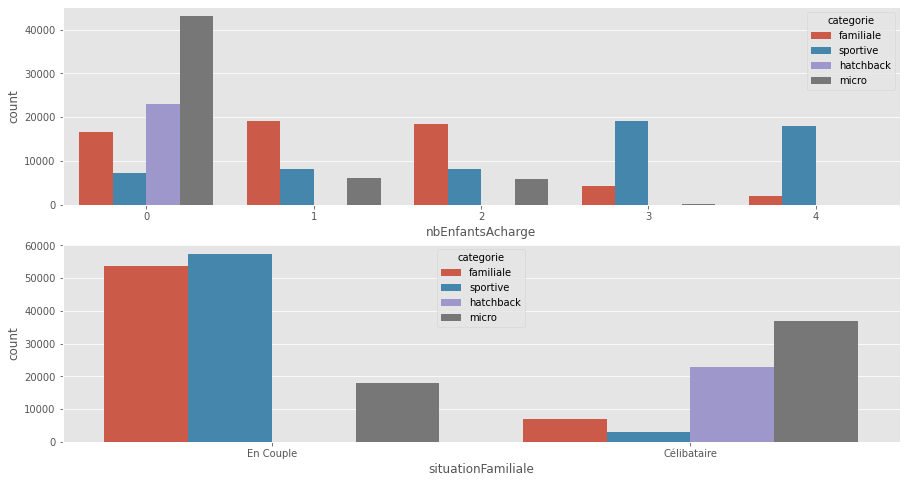

In [47]:
_, axs = plt.subplots(nrows = 2)
sns.countplot(x=final.nbEnfantsAcharge,hue=final.categorie,ax=axs[0])
sns.countplot(x=final.situationFamiliale, hue=final.categorie,ax=axs[1])
plt.show()

1) On constate que la Hatchback est présente chez les personnes Célibataire et chez ceux qui n'ont pas d'enfants ce qui est cohérent
2) les personnes n'ayant pas d'enfant ou ceux qui sont Celibataire ont une tendance à la voiture Citadine
3) Plus le nombre d'enfant augmente plus la berline laisse la place à la sportive qui cette derniere est dominante chez les personnes en couple.

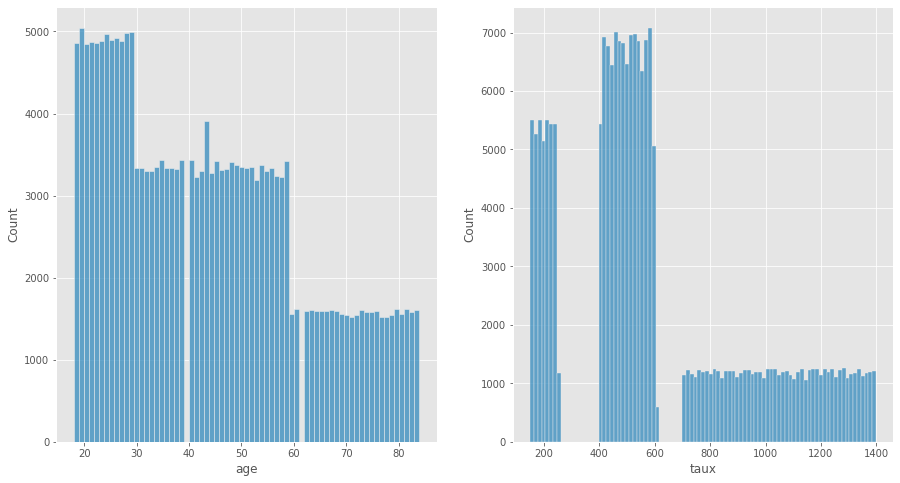

In [48]:
_, axs = plt.subplots(ncols = 2)
sns.histplot(x=final.age, ax=axs[0])
sns.histplot(x=final.taux, ax=axs[1])
plt.show()

On constate que la variation des courbes divise l'age et le taux des personnes en 3 catégories.
On va explore donc les orientations de ces catégories vis à vis des choix des voitures.

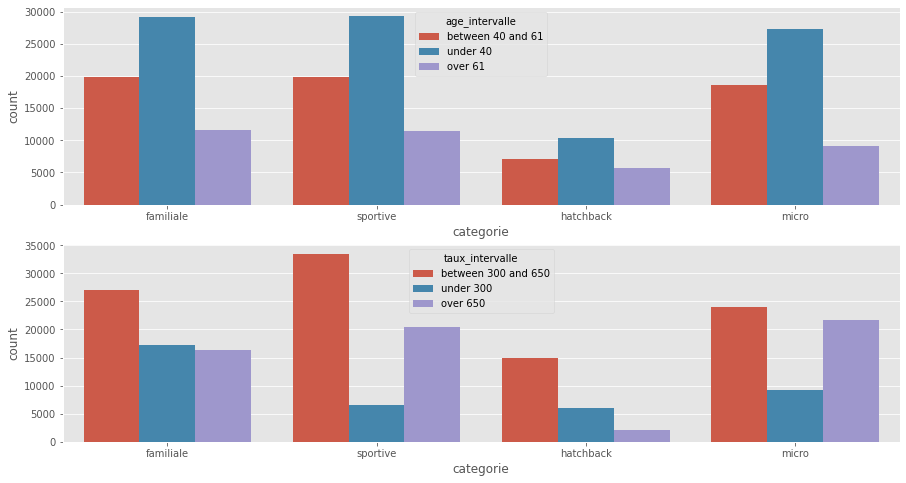

In [49]:
final_temp=final
final_temp.loc[final.age<=40,'age_intervalle']='under 40'
final_temp.loc[(final.age<61)&(final.age>40),'age_intervalle']='between 40 and 61'
final_temp.loc[final.age>=61,'age_intervalle']='over 61'
final_temp.loc[final.taux<=300,'taux_intervalle']='under 300'
final_temp.loc[(final.taux<650)&(final.taux>300),'taux_intervalle']='between 300 and 650'
final_temp.loc[final.taux>=650,'taux_intervalle']='over 650'
_, axs = plt.subplots(nrows = 2)
sns.countplot(x=final_temp.categorie,hue=final_temp.age_intervalle,ax=axs[0])
sns.countplot(x=final_temp.categorie, hue=final_temp.taux_intervalle,ax=axs[1])
plt.show()


1)On constate que les personnes ayant un age inférieur à 40 ans sont ceux qui achete plus de voiture et sont plus orienté à une sportive ou meme une berline, par contre, les personnes agées de plus de 61 ans sont ceux qui achete moins de voiture.
2)le deuxieme plot nous montre que les personnes qui ont un taux entre 300 et 650 sont ceux qui achete plus de voiture et ils sont plus orientés vers une sportive par contre ceux qui ont un taux sous 300 sont ceux qui achetent le moins ce qui est logique, ajoutant à cela, les gens qui ont un taux d'endettement supérieur à 650 n'achetent pas de voiture de type 'Micro'

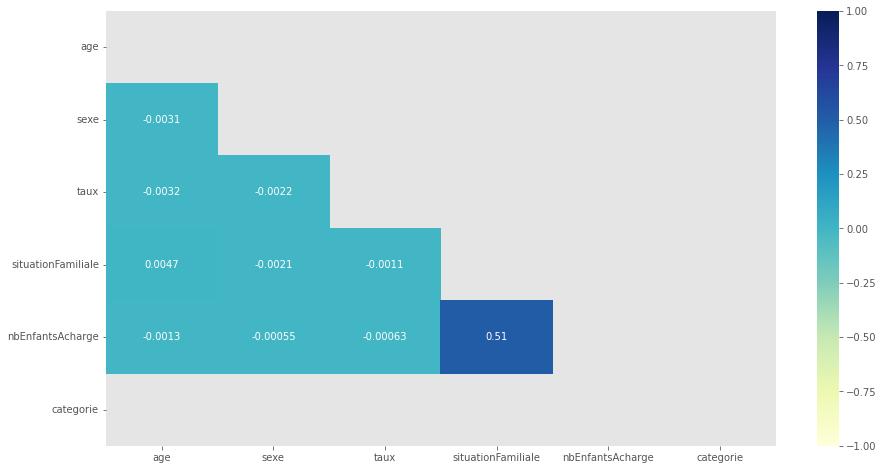

In [50]:
data_corr = final[['age','sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge', 'categorie']]\
    .assign(sexe = final.sexe.map({'F': 0, 'M': 1}),situationFamiliale = final.situationFamiliale.map({'Célibataire': 0, 'En Couple': 1}),\
        categorie = final.categorie.map({'Berline': 0, 'Sportive': 1,'Hatchback': 2,'Citadine': 3,'Micro': 4})).corr()
mask = np.triu(np.ones_like(data_corr))
sns.heatmap(data_corr, cmap="YlGnBu", annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

### 3 Random Forest

In [51]:
final.drop(columns=['age_intervalle','taux_intervalle'],inplace=True,axis=1)
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,familiale
1,20,M,422,En Couple,2,false,3721 QS 49,1,sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,micro
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,micro
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,micro
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,micro
200667,64,M,179,En Couple,0,false,9059 XM 27,4,sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,hatchback


In [52]:
final

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,Unnamed: 0,categorie
0,44,M,476,En Couple,0,false,3176 TS 67,99,familiale
1,20,M,422,En Couple,2,false,3721 QS 49,1,sportive
2,49,F,221,Célibataire,0,false,9099 UV 26,41,hatchback
3,57,M,246,Célibataire,0,false,3563 LA 55,113,micro
4,58,M,1149,Célibataire,0,false,6963 AX 34,262,micro
...,...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,false,8108 RO 11,266,micro
200666,21,F,235,Célibataire,0,false,7268 LO 18,118,micro
200667,64,M,179,En Couple,0,false,9059 XM 27,4,sportive
200668,71,M,836,Célibataire,0,false,9945 TN 57,156,hatchback


In [53]:
final_cleaning_2=final.drop('immatriculation',axis=1)
final_cleaning_2['2eme voiture']=final_cleaning_2['2eme voiture'].map({'false':0,'true':1})
final_cleaning_2

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie
0,44,M,476,En Couple,0,0,99,familiale
1,20,M,422,En Couple,2,0,1,sportive
2,49,F,221,Célibataire,0,0,41,hatchback
3,57,M,246,Célibataire,0,0,113,micro
4,58,M,1149,Célibataire,0,0,262,micro
...,...,...,...,...,...,...,...,...
200665,40,F,1000,Célibataire,0,0,266,micro
200666,21,F,235,Célibataire,0,0,118,micro
200667,64,M,179,En Couple,0,0,4,sportive
200668,71,M,836,Célibataire,0,0,156,hatchback


In [54]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [55]:
cols_ohe = ['sexe', 'situationFamiliale']
cols_num = ['age', 'taux','nbEnfantsAcharge', '2eme voiture']
final_cleaning_3=pd.get_dummies(data=final_cleaning_2, columns=cols_ohe)

In [56]:
final_cleaning_3

,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
0,44,476,0,0,99,familiale,0,1,0,1
1,20,422,2,0,1,sportive,0,1,0,1
2,49,221,0,0,41,hatchback,1,0,1,0
3,57,246,0,0,113,micro,0,1,1,0
4,58,1149,0,0,262,micro,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
200665,40,1000,0,0,266,micro,1,0,1,0
200666,21,235,0,0,118,micro,1,0,1,0
200667,64,179,0,0,4,sportive,0,1,0,1
200668,71,836,0,0,156,hatchback,0,1,1,0


In [57]:
cols_scale = ['age', 'taux','nbEnfantsAcharge']
scaler = StandardScaler()
final_cleaning_3[cols_scale] = scaler.fit_transform(final_cleaning_3[cols_scale])

In [58]:
final_cleaning_3

,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
0,0.016296,-0.395810,-0.899475,0,99,familiale,0,1,0,1
1,-1.302802,-0.557215,0.540801,0,1,sportive,0,1,0,1
2,0.291108,-1.158000,-0.899475,0,41,hatchback,1,0,1,0
3,0.730808,-1.083276,-0.899475,0,113,micro,0,1,1,0
4,0.785770,1.615774,-0.899475,0,262,micro,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
200665,-0.203553,1.170416,-0.899475,0,266,micro,1,0,1,0
200666,-1.247839,-1.116155,-0.899475,0,118,micro,1,0,1,0
200667,1.115545,-1.283538,-0.899475,0,4,sportive,0,1,0,1
200668,1.500282,0.680223,-0.899475,0,156,hatchback,0,1,1,0


In [59]:
display(final_cleaning_3.sample(5))
final_cleaning_3.describe()

,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,categorie,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
182480,0.455996,1.113626,1.981078,0,232,sportive,0,1,0,1
52821,-1.137914,-1.125122,-0.899475,1,24,micro,0,1,0,1
116988,0.181184,0.623433,-0.899475,0,187,familiale,0,1,0,1
180658,-1.192877,-0.503413,-0.899475,1,268,micro,0,1,0,1
80267,-0.698215,-1.146044,-0.899475,0,115,micro,0,1,1,0


,age,taux,nbEnfantsAcharge,2eme voiture,Unnamed: 0,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
count,1.990390e+05,1.990390e+05,1.990390e+05,199039.000000,199039.000000,199039.000000,199039.000000,199039.000000,199039.000000
mean,-3.255737e-16,7.245714e-18,6.936631e-16,0.130080,153.805104,0.299715,0.700285,0.351524,0.648476
std,1.000003e+00,1.000003e+00,1.000003e+00,0.336392,84.520496,0.458134,0.458134,0.477447,0.477447
min,-1.412726e+00,-1.370218e+00,-8.994755e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.631023e-01,-5.602041e-01,-8.994755e-01,0.000000,77.000000,0.000000,0.000000,0.000000,0.000000
50%,-9.362849e-02,-2.583170e-01,-1.793372e-01,0.000000,165.000000,0.000000,1.000000,0.000000,1.000000
75%,6.758453e-01,6.443554e-01,5.408011e-01,0.000000,233.000000,1.000000,1.000000,1.000000,1.000000
max,2.214793e+00,2.363020e+00,1.981078e+00,1.000000,269.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
final_cleaning_3.categorie.value_counts()

familiale    60580
sportive     60548
micro        54932
hatchback    22979
Name: categorie, dtype: int64

In [61]:
y = final_cleaning_3['categorie']
X = final_cleaning_3.drop(columns=['categorie','Unnamed: 0'])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [64]:
# from sklearn.feature_selection import RFECV
# rfecv = RFECV(estimator=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='log2',max_depth=11,n_jobs=2,random_state=0), step=1, cv=10, scoring='accuracy')
# rfecv.fit(X, y)

# print("Optimal number of features: %d" % rfecv.n_features_)
# print('Selected features: %s' % list(X.columns[rfecv.support_]))

In [65]:
# plt.figure(figsize=(10,6))
# plt.xlabel("Number of features selected")
# plt.ylabel("Mean cross validation score (nb of correct classifications)")
# xticks = range(1, X.shape[1]+1)
# plt.plot(xticks, rfecv.cv_results_['mean_test_score'])
# plt.xticks(xticks)
# plt.show()

Le nombre optimal est de 5 selon le RFECV mais selon la courbe on constate une valeur constante(optimale) à partir de 5 features donc on peut garder le meme nombre de features

In [66]:
# from sklearn.model_selection import GridSearchCV
# rfc=RandomForestClassifier(random_state=0)
# param_grid = { 
#     'n_estimators': [100],
#     'max_features': [ 'sqrt', 'auto'],
#     'max_depth' : [11,12,14],
#     'criterion' :['gini', 'entropy']
# }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
# CV_rfc.fit(X_train, y_train)

Apres un test de max_features sur ['None','log2','sqrt','auto'] la valeur sqrt a été choisie
et le max_depth a été testé sur un interval entre [1-15] la valeur optimale est '11'

In [67]:
# CV_rfc.best_params_

In [68]:
rf = RandomForestClassifier(n_estimators=100, 
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=11, 
                                n_jobs=2,
                                random_state=0)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  0.7697546543109945
Testing Accuracy is:  0.7402029742765274


In [69]:
from sklearn.model_selection import cross_val_score, KFold

rf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini',
                             max_features='sqrt',
                             max_depth=11, 
                             random_state=0)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=k_fold)

# Print average score and standard deviation
print("Average cross-validation score: {:.3f}".format(scores.mean()))
print("Standard deviation: {:.3f}".format(scores.std()))

Average cross-validation score: 0.741
Standard deviation: 0.003


In [70]:
# utilisation de la méthode de Under-sampling pour balancer la différence qu'il ya entre les classes
 


# Séparer les classes minoritaires de la classe majoritaire
data_hatchback= final_cleaning_3[final_cleaning_3['categorie'] == 'hatchback']
data_familiale = final_cleaning_3[final_cleaning_3['categorie'] == 'familiale']
data_sportive = final_cleaning_3[final_cleaning_3['categorie'] == 'sportive']
data_micro = final_cleaning_3[final_cleaning_3['categorie'] == 'micro']

# Sous-échantillonner la classe majoritaire (D) pour qu'elle ait le même nombre d'observations que la classe minoritaire (A)
data_familiale_downsampled = resample(data_familiale, replace=False, n_samples=len(data_hatchback), random_state=42)
data_sportive_downsampled = resample(data_sportive, replace=False, n_samples=len(data_hatchback), random_state=42)
data_micro_downsampled = resample(data_micro, replace=False, n_samples=len(data_hatchback), random_state=42)
# Concaténer les classes majoritaire et minoritaire sous-échantillonnées
data_downsampled = pd.concat([data_familiale_downsampled, data_sportive_downsampled, data_micro_downsampled, data_hatchback])
data_downsampled=data_downsampled.drop(columns=['Unnamed: 0'])
# Vérifier la répartition des classes dans le nouveau DataFrame
data_downsampled['categorie'].value_counts()
y = data_downsampled['categorie']
X = data_downsampled.drop(columns=['categorie'])
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

In [71]:
rf = RandomForestClassifier(n_estimators=100, 
                                criterion='gini',
                                max_features='sqrt',
                                max_depth=11, 
                                n_jobs=2,
                                random_state=0)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))
import pickle

# Save the model to a file
with open("random_forest_model.pkl", "wb") as file:
    pickle.dump(rf, file)


Training Accuracy is:  0.7849958899472946
Testing Accuracy is:  0.7693646649260226


In [72]:
from sklearn.model_selection import cross_val_score, KFold

rf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini',
                             max_features='sqrt',
                             max_depth=11, 
                             random_state=0)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# Perform cross-validation
scores = cross_val_score(rf, X_train, y_train, cv=k_fold)

# Print average score and standard deviation
print("Average cross-validation score: {:.3f}".format(scores.mean()))
print("Standard deviation: {:.3f}".format(scores.std()))

Average cross-validation score: 0.774
Standard deviation: 0.003


## Logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression().fit(X_train,y_train)
logreg.score(X_train,y_train)

0.7411754750737392

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.741
LogisticRegression average log_loss is 0.557


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Initialiser les valeurs de C
Cs = [0.000001 + i * 0.1 for i in range(31)]

# Initialiser la meilleure accuracy et le meilleur paramètre C
best_accuracy = 0
best_C = None

# Boucle à travers chaque valeur de C
for C in Cs:
    # Initialiser le modèle de régression logistique avec le paramètre C
    clf = LogisticRegression(C=C, penalty='l2')
    
    # Calculer l'accuracy en utilisant la validation croisée
    accuracy = cross_val_score(clf, X, y, cv=5, scoring='accuracy').mean()
    
    # Mettre à jour la meilleure accuracy et le meilleur paramètre C
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C
        
# Afficher la meilleure accuracy et le meilleur paramètre C
print(f"Best accuracy: {best_accuracy:.2f} with C = {best_C}")


Best accuracy: 0.74 with C = 0.100001


avec solver=liblinear -->0.72 et sans liblinear -->0.74
on constate qu'avec les hyperparamètres par défault on a le meme résultat que pour C entre [0.1 - 3] et une penalty = L2
du coup on va prendre tous simplement le modèle par défault

In [76]:
logreg=LogisticRegression().fit(X_train,y_train)
logreg.score(X_train,y_train)

0.7411754750737392

In [77]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [78]:
import xgboost as xgb
from scipy.stats import uniform, randint

from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [79]:
# from sklearn.model_selection import train_test_split
# X = final_cleaning_3.drop(columns=['categorie','Unnamed: 0'])
# y = final_cleaning_3['categorie']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [80]:
X_train

,age,taux,nbEnfantsAcharge,2eme voiture,sexe_F,sexe_M,situationFamiliale_Célibataire,situationFamiliale_En Couple
98198,0.126221,1.654631,0.540801,0,0,1,0,1
51653,-1.247839,0.973143,1.260939,0,0,1,0,1
139613,-1.302802,-0.129791,-0.899475,0,1,0,1,0
105667,-0.203553,-0.216471,-0.899475,0,0,1,0,1
102135,0.730808,-0.291196,-0.899475,0,0,1,1,0
...,...,...,...,...,...,...,...,...
167872,-0.203553,-1.125122,-0.179337,0,0,1,0,1
106815,-1.412726,0.357413,-0.179337,0,1,0,0,1
93922,0.675845,-0.425700,1.981078,1,1,0,0,1
57765,-0.533328,0.704135,0.540801,0,0,1,0,1


In [81]:
from sklearn.preprocessing import LabelEncoder 

lc = LabelEncoder() 

lc = lc.fit(y) 

lc_y_train = lc.transform(y_train)

lc_y_test = lc.transform(y_test)

In [82]:
lc_y_train

array([3, 3, 2, ..., 3, 3, 2])

In [83]:
# import pandas as pd
# import numpy as np
# import xgboost as xgb
# from sklearn import preprocessing
# from sklearn.model_selection import StratifiedKFold
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split


# # Création du modèle
# xgb_model = xgb.XGBClassifier(objective='multi:softmax')

# # Hyperparamètres à tester via gridsearch
# parameters = {
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 500, 1000]
# }

# # GridSearchCV
# clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=5, 
#                    scoring='accuracy', verbose=2, refit=True)

# # Entraînement du modèle
# clf.fit(X_train, lc_y_train)

# # Affichage des résultats
# print('Meilleur score :', clf.best_score_)
# print('Meilleurs hyperparamètres :', clf.best_params_)

# # Evaluation du modèle sur le jeu de test
# score = clf.score(X_test, lc_y_test)
# print(f"Score sur le jeu de test : {score}")




# # test_probs = clf.predict_proba(test[features])[:,1]

# # xgb_model.fit(X_train, lc_y_train)





Meilleur score : 0.773850430190682
Meilleurs hyperparamètres : {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
Score sur le jeu de test : 0.7707789382071366

In [84]:
# xgb_model = xgb.XGBClassifier(objective='multi:softmax')

# # Hyperparamètres à tester via gridsearch
# parameters = {
#     'learning_rate': [0.01],
#     'max_depth': [7,9,11],
#     'n_estimators': [100],
#     'gamma': [0, 0.1, 0.5],
#     'subsample': [0.5, 0.7, 1.0]
# }

# # GridSearchCV
# clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=5, 
#                    scoring='accuracy', verbose=2, refit=True)

# # Entraînement du modèle
# clf.fit(X_train, lc_y_train)

# # Affichage des résultats
# print('Meilleur score :', clf.best_score_)
# print('Meilleurs hyperparamètres :', clf.best_params_)

# # Evaluation du modèle sur le jeu de test
# score = clf.score(X_test, lc_y_test)
# print(f"Score sur le jeu de test : {score}")

on a donc les meilleurs paramètres pour XGBOOST sont Meilleurs hyperparamètres : {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.5} 

On va essayer encore d'améliorer les hyperparamètres.

In [85]:
# xgb_model = xgb.XGBClassifier(objective='multi:softmax')

# # Hyperparamètres à tester via gridsearch
# parameters = {
#     'learning_rate': [0.01],
#     'max_depth': [9],
#     'n_estimators': [100],
#     'gamma': [0],
#     'subsample': [0.5],
#     'min_child_weight': [1, 5, 10, 50],
#     'colsample_bytree': [0.5, 0.7, 1.0],
#     'reg_alpha': [0, 0.1, 0.5, 1.0]
# }

# # GridSearchCV
# clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
#                    cv=5, 
#                    scoring='accuracy', verbose=2, refit=True)

# # Entraînement du modèle
# clf.fit(X_train, lc_y_train)

# # Affichage des résultats
# print('Meilleur score :', clf.best_score_)
# print('Meilleurs hyperparamètres :', clf.best_params_)

# # Evaluation du modèle sur le jeu de test
# score = clf.score(X_test, lc_y_test)
# print(f"Score sur le jeu de test : {score}")

Meme avec le modèle XGBOOST Amélioré le random forest offre un meilleur Score, on va donc garder le Random Forest Classifier.

In [86]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC

# # Définir les hyperparamètres à tester
# param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}

# # Créer un modèle SVC
# svc = SVC()

# # Créer un objet GridSearchCV pour trouver les meilleurs hyperparamètres
# grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5)

# # Effectuer la recherche sur les données d'entraînement
# grid_search.fit(X_train, y_train)

# # Afficher les meilleurs hyperparamètres trouvés
# print("Meilleurs hyperparamètres : ", grid_search.best_params_)

# # Utiliser le meilleur modèle pour faire des prédictions sur les données de test
# y_pred = grid_search.predict(X_test)

# # Afficher les scores du modèle sur les données de test
# print("Score sur les données de test : ", grid_search.score(X_test, y_test))


Meilleurs hyperparamètres :  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'} <br>
Score sur les données de test :  0.7683855526544822


Randomforest Reste le meilleure modèle jusqu'à présent

In [ ]:
marketing_df=pd.read_csv('Données_communes/Marketing.csv',encoding='ISO-8859-1')
cols_ohe=['sexe','situationFamiliale']
cols_num=['age','taux','nbEnfantsAcharge','2eme voiture']
final_marketing=pd.get_dummies(data=marketing_df,columns=cols_ohe)
cols_scale=['age','taux','nbEnfantsAcharge']
scaler=StandardScaler()
final_marketing[cols_scale]=scaler.fit_transform(final_marketing[cols_scale])
final_marketing['2eme voiture']=final_marketing['2eme voiture'].map({False:0,True:1})
prediction_test=rf.predict(X=final_marketing)
prediction_test

array(['Citadine', 'Hatchback', 'Hatchback', 'Micro', 'Berline',
       'Berline', 'Berline', 'Citadine', 'Hatchback', 'Berline',
       'Berline', 'Hatchback', 'Citadine', 'Berline', 'Micro', 'Micro',
       'Berline', 'Micro', 'Hatchback', 'Micro'], dtype=object)

In [1]:
# data_downsampled.to_pickle('data_smpl.pkl')

NameError: name 'data_downsampled' is not defined

: 